# Lectura netCDF

## Integrantes:

* Carla Gulizia
* Natalia Zazulie
* Natalia Montroull

In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm
%matplotlib inline

In [2]:
#path = '/home/usuario/wpc/wpc-original/Clase_3/'
path = '../../../data/'
file = 'pr_Amon_CanESM2_historical_r1i1p1_193101-200512_SA.nc'
file_in = path + file
#file_in
ncfile = netCDF4.Dataset(file_in)

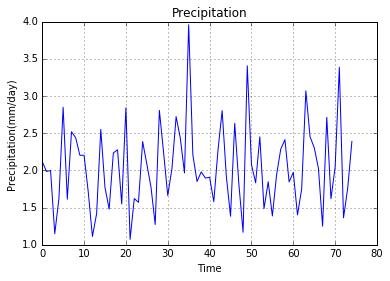

In [3]:
#ncfile      #Contiene metadata del archivo (como ncdump)
pre = ncfile.variables["pr"]          #pre es un objeto
pre_data = pre[0::12,:,:]*60*60*24    #un array de numpy
#ncfile.close()
pre_ene1 = pre_data[:,3,10]
plt.plot(pre_data[:,3,10])
plt.grid()
plt.title(pre.long_name )
plt.ylabel(pre.long_name + "(mm/day)")
plt.xlabel("Time")

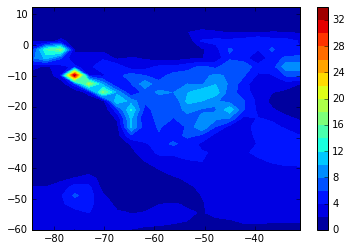

In [4]:
#Graficar un campo de PP
#Extraigo lat y lon
lat = ncfile.variables["lat"][:]
lon = ncfile.variables["lon"][:]-360
pre_med_ene = np.nanmean(pre_data[:,:,:],axis=0)
plt.contourf(lon,lat,pre_med_ene,20)
plt.colorbar(orientation="vertical")


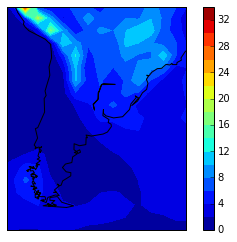

In [5]:
#usando basemap
mapa = bm.Basemap(projection='cyl',llcrnrlat=-60,urcrnrlat=-10,\
            llcrnrlon=-80,urcrnrlon=-40,resolution='c')
mapa.drawcoastlines()
lonm, latm = np.meshgrid(lon, lat)
lonproj, latproj = mapa(lonm, latm)
plt.contourf(lonproj, latproj, pre_med_ene,20)
plt.colorbar(orientation="vertical")

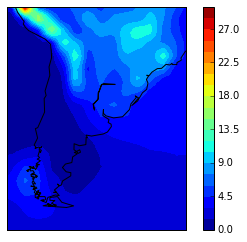

In [6]:
#Interpolacion
from scipy import interpolate
f = interpolate.interp2d(lon, lat, pre_med_ene, kind='linear')
lon_new = np.arange(-85, -30, 1)
lat_new = np.arange(-60,12,1)
pre_med_ene_1deg = f(lon_new, lat_new)
#Grafico con la nueva grilla
mapa = bm.Basemap(projection='cyl',llcrnrlat=-60,urcrnrlat=-10,\
            llcrnrlon=-80,urcrnrlon=-40,resolution='c')
mapa.drawcoastlines()
lonm1deg, latm1deg = np.meshgrid(lon_new, lat_new)
lonproj1deg, latproj1deg = mapa(lonm1deg, latm1deg)
plt.contourf(lonproj1deg, latproj1deg, pre_med_ene_1deg,20)
plt.colorbar(orientation="vertical")

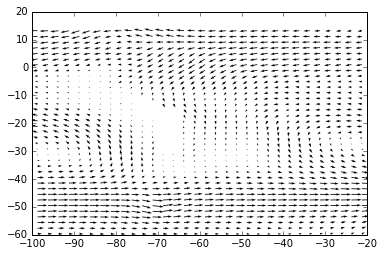

In [8]:
#Abrimos los datos de viento
fileu = 'ua_Amon_GFDL-ESM2M_historical_r1i1p1_199001-199912_SA_1000-700hPa.nc'
filev = 'va_Amon_GFDL-ESM2M_historical_r1i1p1_199001-199912_SA_1000-700hPa.nc'
ncfileu = netCDF4.Dataset(path + fileu)
ncfilev = netCDF4.Dataset(path + filev)
levels = ncfileu.variables["plev"][:]
# np.where(levels == 85000)[0]
u850_ene = ncfileu.variables["ua"][::12,2,:,:]
v850_ene = ncfilev.variables["va"][::12,2,:,:]
u850_med_ene = np.nanmean(u850_ene[:,:,:],axis=0)
v850_med_ene = np.nanmean(v850_ene[:,:,:],axis=0)
#Extraigo las lat y lon de GFDL
latuv = ncfileu.variables["lat"][:]
lonuv = ncfileu.variables["lon"][:]-360

#Grafico sin interpolar
lonm1,latm1 = np.meshgrid(lonuv,latuv)
plt.quiver(lonm1,latm1,u850_med_ene,v850_med_ene)


#Interpolo a la lat/lon 
fu = interpolate.interp2d(lonuv,latuv,u850_med_ene, kind='linear')
fv = interpolate.interp2d(lonuv,latuv, v850_med_ene, kind='linear')
lon_newuv = np.arange(-99, -20, 1)
lat_newuv = np.arange(-60,13,1)
u850_med_ene_1deg = fu(lon_newuv,lat_newuv)
v850_med_ene_1deg = fv(lon_newuv,lat_newuv)

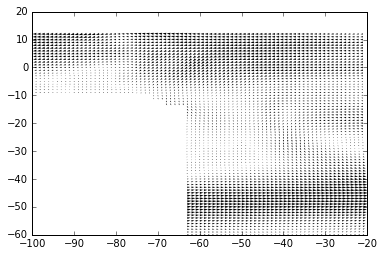

In [9]:
#Grafico u y v con quiver
#mapa2 = bm.Basemap(projection='cyl',llcrnrlat=-60,urcrnrlat=10,\
#            llcrnrlon=-90,urcrnrlon=-20,resolution='c')
#mapa.drawcoastlines()
lonm2,latm2 = np.meshgrid(lon_newuv, lat_newuv)
#lonproj2, latproj2 = mapa(lonm2, latm2)
plt.quiver(lon_newuv, lat_newuv,u850_med_ene_1deg,v850_med_ene_1deg )

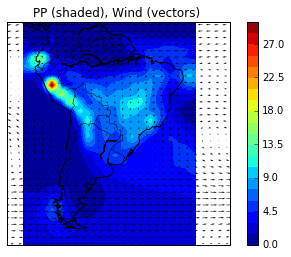

In [10]:
#Grafico PP sombreado, u y v con quiver
#lon-lat de u,v
lonproj2, latproj2 = mapa(lonm1,latm1)


mapa2 = bm.Basemap(projection='cyl',llcrnrlat=-60,urcrnrlat=10,\
            llcrnrlon=-90,urcrnrlon=-20,resolution='c')
mapa2.drawcoastlines()
mapa2.drawcountries()
#mapa2.drawstates()
plt.contourf(lonproj1deg, latproj1deg, pre_med_ene_1deg,20)
plt.colorbar(orientation="vertical")
plt.quiver(lonproj2, latproj2,u850_med_ene,v850_med_ene)
plt.title("PP (shaded), Wind (vectors) ")



In [1]:
#Este css es trabajo de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = '../../css/personal.css'
HTML(open(css_file, "r").read())